#Predicción de popularidad para canciones de Spotify

## 1. Presentación

##2. Objetivo

El presente Kernel tiene como objetivo analizar de forma general los datos

##3. Base de datos
La base de datos se adquirió a través de https://data.buenosaires.gob.ar/dataset/ la cual contiene informacion sobre los viajes realizados en bicicletas del estado por la ciudad CABA en 2021

## Importar Paquetes necesarios.

In [2]:
import numpy as np 
import pandas as pd # Trabajo con bases de datos
import seaborn as sns # Visualización de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh') 
import matplotlib.style as style #Graficos


In [26]:
from matplotlib.ticker import FormatStrFormatter

## Lectura y vista de la base de datos

In [42]:
#Lectura de archivo .csv

df = pd.read_csv('trips_2021.csv')

#Visualizar primeras 5 filas de datos
df.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta
0,10758473BAEcobici,591,2021-04-10 20:38:24 UTC,2BAEcobici,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",-58.374715,-34.592423,2021-04-10 20:48:15 UTC,95BAEcobici,095 - ESMERALDA,ESMERALDA 516,-58.378168,-34.602112,86840BAEcobici,ICONIC
1,10757803BAEcobici,1321,2021-04-10 16:34:08 UTC,2BAEcobici,002 - Retiro I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",-58.374715,-34.592423,2021-04-10 16:56:09 UTC,73BAEcobici,073 - Ruy Díaz de Guzmán,Avenida Martin Garcia y Ruy Díaz de Guzmán,-58.371823,-34.630681,52860BAEcobici,ICONIC
2,10756603BAEcobici,380,2021-04-10 07:06:00 UTC,3BAEcobici,003 - ADUANA,Moreno & Av Paseo Colon,-58.368260,-34.611032,2021-04-10 07:12:20 UTC,150BAEcobici,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,375594BAEcobici,ICONIC
3,10756618BAEcobici,1436,2021-04-10 07:25:08 UTC,4BAEcobici,004 - Plaza Roma,Lavalle & Bouchard,-58.368781,-34.601822,2021-04-10 07:49:04 UTC,353BAEcobici,237 - Madero Office,"367 Sanchez De Thompson, Mariquita",-58.364695,-34.599036,489972BAEcobici,ICONIC
4,10757830BAEcobici,3736,2021-04-10 16:45:01 UTC,4BAEcobici,004 - Plaza Roma,Lavalle & Bouchard,-58.368781,-34.601822,2021-04-10 17:47:17 UTC,207BAEcobici,123 - BASUALDO Y RODO,Basualdo 1218,-58.492634,-34.649324,77965BAEcobici,ICONIC


In [43]:
#Visualizar tamaño de la base de datos
print("El tamaño de la base de datos es de:", df.shape)

El tamaño de la base de datos es de: (2649845, 16)


In [44]:
#Información general sobre la base de datos: Columnas, datos nulos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649845 entries, 0 to 2649844
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_recorrido                object 
 1   duracion_recorrido          int64  
 2   fecha_origen_recorrido      object 
 3   id_estacion_origen          object 
 4   nombre_estacion_origen      object 
 5   direccion_estacion_origen   object 
 6   long_estacion_origen        float64
 7   lat_estacion_origen         float64
 8   fecha_destino_recorrido     object 
 9   id_estacion_destino         object 
 10  nombre_estacion_destino     object 
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  id_usuario                  object 
 15  modelo_bicicleta            object 
dtypes: float64(4), int64(1), object(11)
memory usage: 323.5+ MB


In [45]:
df.isna().sum()

id_recorrido                  0
duracion_recorrido            0
fecha_origen_recorrido        0
id_estacion_origen            0
nombre_estacion_origen        0
direccion_estacion_origen     0
long_estacion_origen          0
lat_estacion_origen           0
fecha_destino_recorrido       0
id_estacion_destino           0
nombre_estacion_destino       0
direccion_estacion_destino    0
long_estacion_destino         0
lat_estacion_destino          0
id_usuario                    0
modelo_bicicleta              0
dtype: int64

# La base no requiere una limpieza de datos nulos ya que vemos la ausencia de estos.

In [46]:
# Descripción de la estadistica descriptiva de los datos. Información trnaspuesta para facil lectura
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duracion_recorrido,2649845.0,1235.183183,9773.919930,61.00000,640.000000,1015.000000,1533.000000,1.351522e+07
long_estacion_origen,2649845.0,-58.418870,0.032251,-58.52174,-58.441607,-58.416118,-58.395055,-5.835547e+01
lat_estacion_origen,2649845.0,-34.598317,0.022281,-34.68294,-34.612298,-34.598600,-34.583749,-3.454450e+01
long_estacion_destino,2649845.0,-58.418744,0.032425,-58.52174,-58.441607,-58.416118,-58.395055,-5.835547e+01
lat_estacion_destino,2649845.0,-34.598490,0.022547,-34.68294,-34.613636,-34.599036,-34.583749,-3.454450e+01


# Identificamos que tenemos outliers en la columna duracion_recorrido, vamos a buscar mejor en esta columna

In [47]:
df.duracion_recorrido.describe()

count    2.649845e+06
mean     1.235183e+03
std      9.773920e+03
min      6.100000e+01
25%      6.400000e+02
50%      1.015000e+03
75%      1.533000e+03
max      1.351522e+07
Name: duracion_recorrido, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


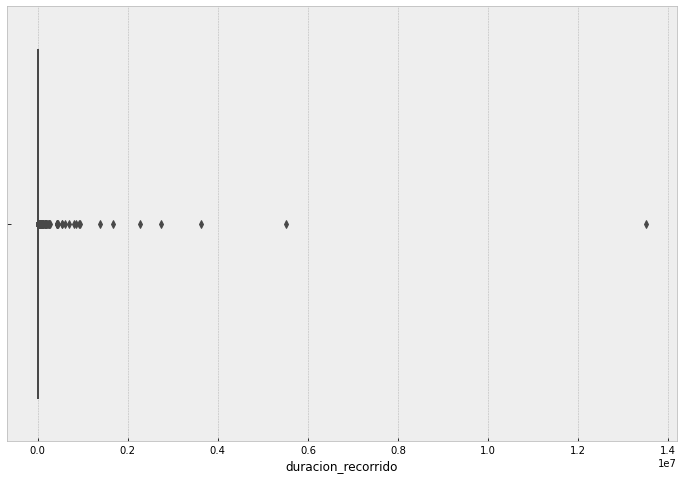

In [48]:
from seaborn import boxplot
fig, ax = plt.subplots(figsize = (12, 8))
boxplot(df.duracion_recorrido, orient="v")

In [31]:
from matplotlib import rcParams

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


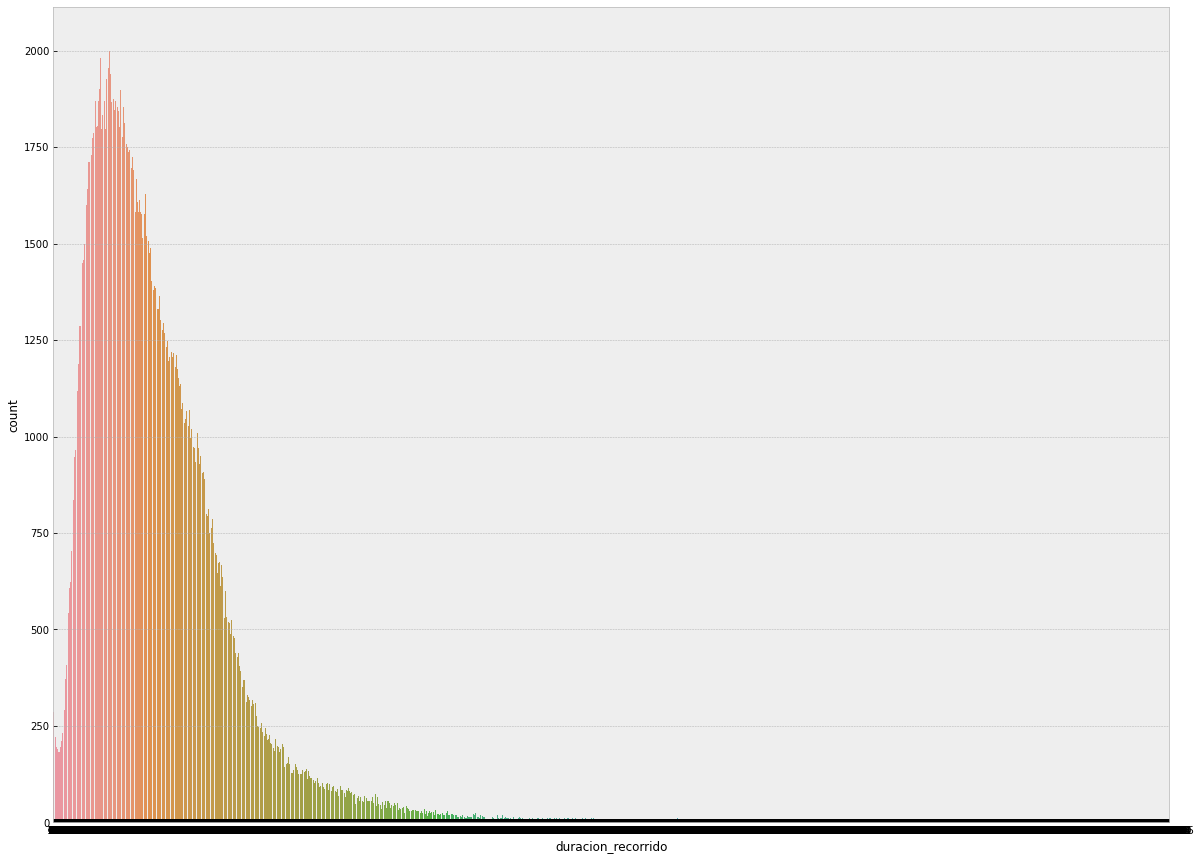

In [36]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.countplot(df['duracion_recorrido'])

In [7]:
#Nombrar atributos
print(df.keys())

Index(['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido',
       'id_estacion_origen', 'nombre_estacion_origen',
       'direccion_estacion_origen', 'long_estacion_origen',
       'lat_estacion_origen', 'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 'id_usuario',
       'modelo_bicicleta'],
      dtype='object')


In [49]:
df.drop(df[df['duracion_recorrido'] > 2000000].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


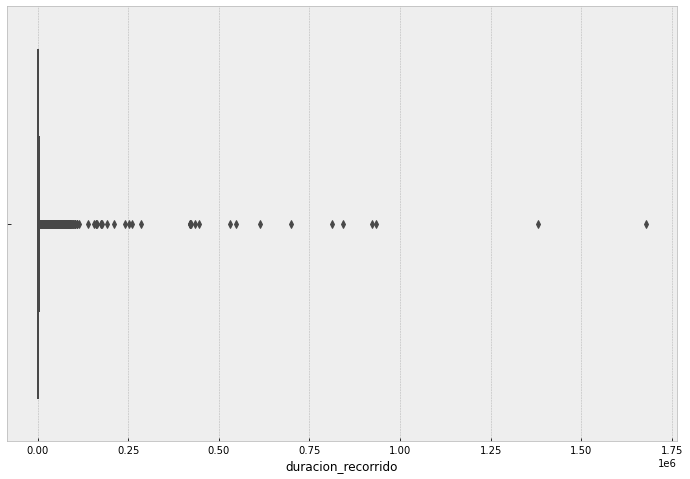

In [50]:
from seaborn import boxplot
fig, ax = plt.subplots(figsize = (12, 8))
boxplot(df.duracion_recorrido, orient="v")

Vemos que continuamos con outliers demarcados, debido a esto se decidio realizar una busqueda sobre la duracion delimitada del uso de las bicicletas y se identifico que el tipo maximo establecido por el estado es de 30 minutos, osea 1800segundos, lo que sobrepase esto puede ser considerado outlier (siempre y cuando nuestro analisis no requiera sacar informacion de los casos que se pasan del tiempo solicitado) fuente:https://www.buenosaires.gob.ar/noticias/ecobici-el-tiempo-maximo-de-uso-es-de-30-minutos#:~:text=30%20minutos%20m%C3%A1ximo%20por%20viaje,usuario%20debe%20esperar%2015%20minutos.

Vamos a cortar el dataset por duracion del viaje en 3000.

In [52]:
df.drop(df[df['duracion_recorrido'] > 3000].index, inplace = True)

In [53]:
# Descripción de la estadistica descriptiva de los datos. comparando con la descripcion anterior, 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
duracion_recorrido,2555436.0,1092.299501,591.994078,61.00000,628.000000,985.000000,1465.000000,3000.000000
long_estacion_origen,2555436.0,-58.418776,0.032081,-58.52174,-58.440584,-58.416118,-58.395055,-58.355465
lat_estacion_origen,2555436.0,-34.598408,0.022154,-34.68294,-34.612298,-34.598600,-34.583749,-34.544503
long_estacion_destino,2555436.0,-58.418619,0.032241,-58.52174,-58.440584,-58.416118,-58.395055,-58.355465
lat_estacion_destino,2555436.0,-34.598592,0.022405,-34.68294,-34.612346,-34.599036,-34.583749,-34.544503


Vemos que el percentil 75% disminuyo un poco.

In [54]:
#Veamos el tamaño actual de la base de datos, teniendo en cuenta que anteriormente eran 2649845
print("El tamaño de la base de datos es de:", df.shape)

El tamaño de la base de datos es de: (2555436, 16)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


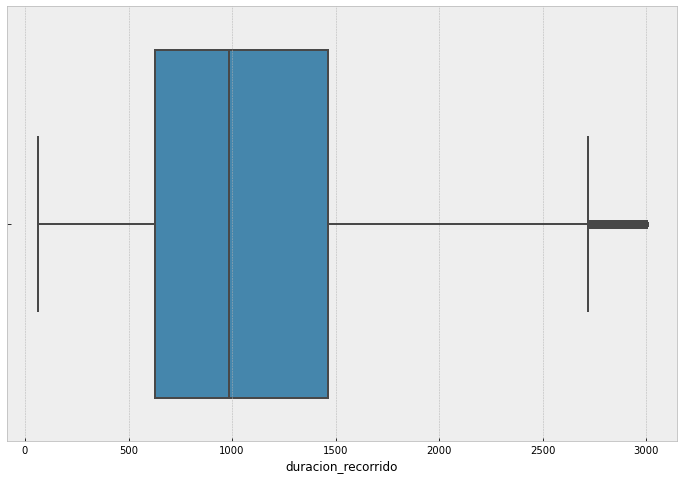

In [55]:
from seaborn import boxplot
fig, ax = plt.subplots(figsize = (12, 8))
boxplot(df.duracion_recorrido, orient="v")

# Ahora si podemos ver que la duracion disminuyo en outliers y se puede apreciar mejor el boxplot. Vemos que tenemos la mayor parte de las duraciones entre 500 y 1500, y ahora tenemos ouliers "sanos" luego de los 2800 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


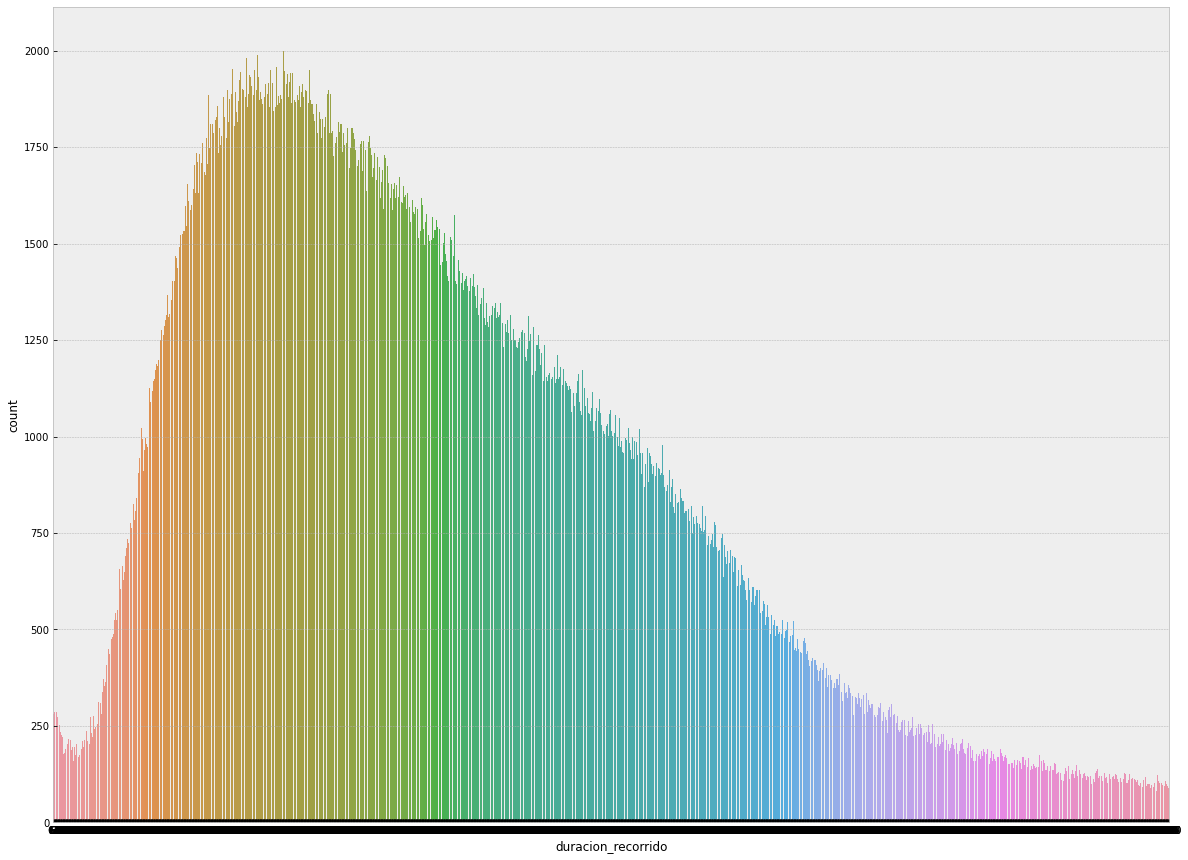

In [56]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.countplot(df['duracion_recorrido'])

# Con el resultado de este Dataset, vamos a trabajar en SQl y luego en Power BI